# ML Final Project - Suenkei Chan

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
for dirname, _, filenames in os.walk('/Users/suenkeichan/Downloads/severstal-steel-defect-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/suenkeichan/Downloads/severstal-steel-defect-detection/train.csv
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/sample_submission.csv
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images/2b6c68337.jpg
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images/73ff8efef.jpg
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images/1e45cda5b.jpg
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images/549fb29f7.jpg
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images/5f0696eb5.jpg
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images/f9462ebef.jpg
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images/28fdc7d3d.jpg
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images/0adb09acc.jpg
/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images/e0d6b15d3.jpg
/Users/suenkeichan/Downloads/severstal-steel-defect-

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator
import cv2 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2

In [4]:
df_train = pd.read_csv("severstal-steel-defect-detection/train.csv")

In [5]:
df_train.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [6]:
df_train.sample(10)

,ImageId,ClassId,EncodedPixels
5980,d6d2ca6e1.jpg,2,379124 13 379355 38 379585 64 379816 89 380047...
4092,94a97adc8.jpg,3,120577 33 120833 97 121089 161 121345 193 1216...
2588,603bb9003.jpg,3,230259 15 230515 43 230771 57 231026 58 231282...
3909,8e9103c91.jpg,3,354216 20 354462 60 354708 85 354959 90 355214...
2136,4ec0d49df.jpg,3,125953 4351 130305 255 130561 255 130817 255 1...
2438,5ad537934.jpg,3,119314 6 119560 18 119811 25 120067 26 120323 ...
2033,4b762b230.jpg,3,128651 34 128886 103 129121 148 129357 169 129...
6585,ed1c6be8d.jpg,3,134651 1 134906 4 135160 8 135415 10 135670 11...
1329,306b1dbc1.jpg,3,38657 118 38913 235 39169 235 39425 234 39681 ...
1021,24e21e85a.jpg,3,125095 4 125347 9 125599 14 125851 20 126102 2...


In [7]:
df_train.shape

(7095, 3)

We have 7095 observations and 3 features.

In [8]:
df_train.describe

<bound method NDFrame.describe of             ImageId  ClassId  \
0     0002cc93b.jpg        1   
1     0007a71bf.jpg        3   
2     000a4bcdd.jpg        1   
3     000f6bf48.jpg        4   
4     0014fce06.jpg        3   
...             ...      ...   
7090  ffcf72ecf.jpg        3   
7091  fff02e9c5.jpg        3   
7092  fffe98443.jpg        3   
7093  ffff4eaa8.jpg        3   
7094  ffffd67df.jpg        3   

                                          EncodedPixels  
0     29102 12 29346 24 29602 24 29858 24 30114 24 3...  
1     18661 28 18863 82 19091 110 19347 110 19603 11...  
2     37607 3 37858 8 38108 14 38359 20 38610 25 388...  
3     131973 1 132228 4 132483 6 132738 8 132993 11 ...  
4     229501 11 229741 33 229981 55 230221 77 230468...  
...                                                 ...  
7090  121911 34 122167 101 122422 169 122678 203 122...  
7091  207523 3 207777 9 208030 15 208283 22 208537 2...  
7092  105929 5 106177 14 106424 24 106672 33 106923 ...  
7

In [9]:
df_train.isnull()

,ImageId,ClassId,EncodedPixels
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7090,False,False,False
7091,False,False,False
7092,False,False,False
7093,False,False,False


3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

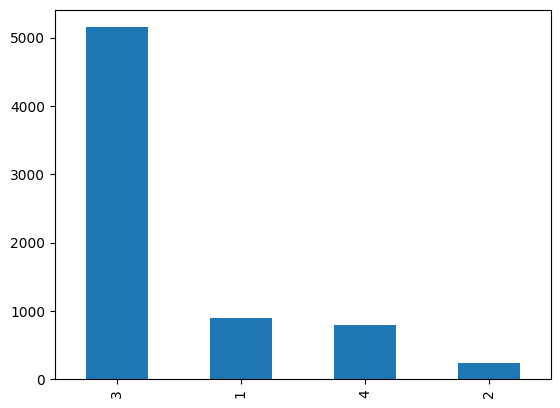

In [10]:
df_train["ClassId"].value_counts().plot(kind = 'bar')
df_train['ClassId'].value_counts()

Image Augmentation

In [11]:
l1=[]
l2=[] 
for img,ClassId,EncodedPixels in tqdm(df_train.values):
    image=cv2.imread("severstal-steel-defect-detection/train_images/{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(120,120))
    l1.append(image)
    l2.append(ClassId)

100%|██████████| 7095/7095 [00:14<00:00, 478.04it/s]


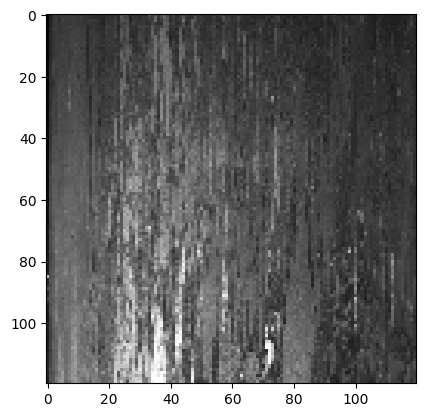

In [12]:
plt.imshow(l1[15]);

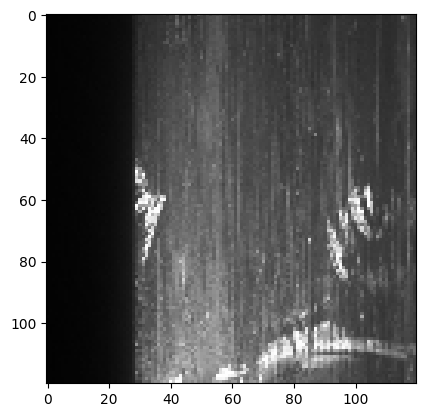

In [13]:
plt.imshow(l1[100]);

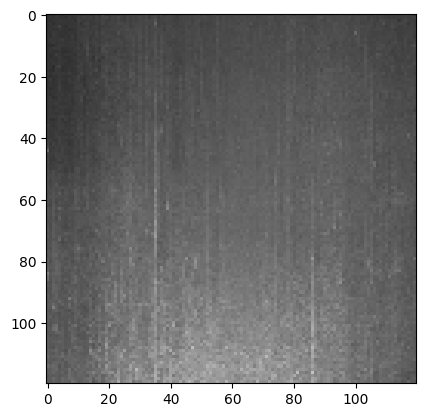

In [14]:
plt.imshow(l1[1]);

### Label encoding and one hot encoding

In [15]:
encoder = LabelEncoder()
X = np.array(l1)

y = encoder.fit_transform(l2)
y = to_categorical(y)

In [16]:
y

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [17]:
X[0]

array([[[ 73,  73,  73],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 44,  44,  44],
        [ 51,  51,  51],
        [ 50,  50,  50]],

       [[ 70,  70,  70],
        [ 74,  74,  74],
        [ 65,  65,  65],
        ...,
        [ 47,  47,  47],
        [ 51,  51,  51],
        [ 50,  50,  50]],

       [[ 62,  62,  62],
        [ 78,  78,  78],
        [ 66,  66,  66],
        ...,
        [ 42,  42,  42],
        [ 54,  54,  54],
        [ 49,  49,  49]],

       ...,

       [[111, 111, 111],
        [120, 120, 120],
        [110, 110, 110],
        ...,
        [ 57,  57,  57],
        [ 65,  65,  65],
        [ 55,  55,  55]],

       [[115, 115, 115],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 57,  57,  57],
        [ 75,  75,  75],
        [ 58,  58,  58]],

       [[106, 106, 106],
        [121, 121, 121],
        [134, 134, 134],
        ...,
        [ 56,  56,  56],
        [ 81,  81,  81],
        [ 61,  61,  61]]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3)

### Build the CNN Model

In [20]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=4,activation="softmax"))

In [21]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

In [23]:
#Fit the model
fitted_model = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/10
39/39 [==============================] - 9s 229ms/step - loss: 1.0534 - accuracy: 0.6994 - val_loss: 0.8528 - val_accuracy: 0.7248
Epoch 2/10
39/39 [==============================] - 8s 216ms/step - loss: 0.8131 - accuracy: 0.7263 - val_loss: 0.7908 - val_accuracy: 0.7248
Epoch 3/10
39/39 [==============================] - 9s 224ms/step - loss: 0.7764 - accuracy: 0.7292 - val_loss: 0.7736 - val_accuracy: 0.7417
Epoch 4/10
39/39 [==============================] - 8s 213ms/step - loss: 0.7323 - accuracy: 0.7402 - val_loss: 0.7198 - val_accuracy: 0.7450
Epoch 5/10
39/39 [==============================] - 8s 209ms/step - loss: 0.7133 - accuracy: 0.7447 - val_loss: 0.6869 - val_accuracy: 0.7506
Epoch 6/10
39/39 [==============================] - 8s 217ms/step - loss: 0.6960 - accuracy: 0.7445 - val_loss: 0.7099 - val_accuracy: 0.7374
Epoch 7/10
39/39 [==============================] - 8s 216ms/step - loss: 0.6632 - accuracy: 0.7481 - val_loss: 0.6920 - val_accuracy: 0.7332
Epoch 

In [24]:
result = model.evaluate(X_test, y_test)

67/67 [==============================] - 1s 19ms/step - loss: 0.6545 - accuracy: 0.7553


### Plot the Train and Validation Loss Functions

Text(0.5, 0, 'Epoch')

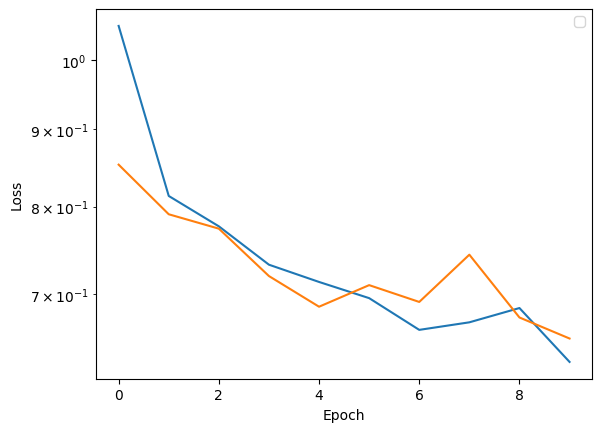

In [25]:
# Generate the train and validation loss functions to determine number of epochs and evidence of overfitting
plt.semilogy(fitted_model.history['loss'])
plt.semilogy(fitted_model.history['val_loss'])
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Plot the Accuracy curve

<AxesSubplot: title={'center': 'Accuracy curve'}>

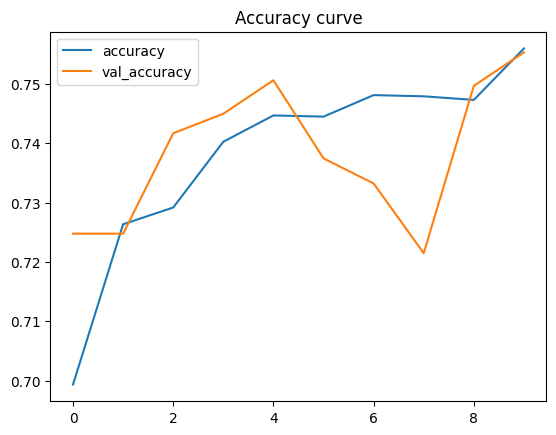

In [26]:
fitted_df = pd.DataFrame(fitted_model.history)
fitted_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

### Accuracy of the model

In [27]:
loss = result[0]
accuracy = result[1]
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 75.53%


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

### Save the model

In [29]:
#save model

model.save('my_model.h5')
print("Saved model")

Saved model


/Users/suenkeichan/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred

67/67 [==============================] - 1s 16ms/step


,0,1,2,3
0,0.093079,0.002325,0.503647,0.400949
1,0.023844,0.000077,0.512525,0.463554
2,0.102581,0.000936,0.554982,0.341500
3,0.197590,0.002866,0.659989,0.139555
4,0.171297,0.001158,0.710312,0.117234
...,...,...,...,...
2124,0.007506,0.000004,0.512523,0.479968
2125,0.264410,0.308680,0.409887,0.017023
2126,0.138267,0.007471,0.720050,0.134213
2127,0.133716,0.244622,0.595583,0.026078


In [31]:
predicted_label = y_pred.idxmax(axis=1)
predicted_prob = y_pred.max(axis=1)
test_label = y_test.argmax(axis=1)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

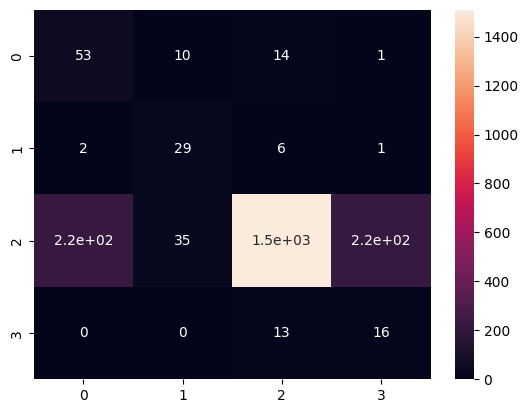

In [33]:
cm = confusion_matrix(predicted_label,test_label)
sns.heatmap(cm,annot=True)
plt.savefig('confusion_matrix.png',dpi=600)
plt.show()

In [34]:
loss1, acc1 = model.evaluate(X_train, y_train)
loss2, acc2 = model.evaluate(X_test, y_test)

67/67 [==============================] - 1s 16ms/step - loss: 0.6545 - accuracy: 0.7553


In [35]:
image_list = os.listdir('/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images')

### Test the Image (file test) with the model.¶

In [36]:
predicted_classes = []

for image_name in image_list:
    image_path = os.path.join('/Users/suenkeichan/Downloads/severstal-steel-defect-detection/test_images', image_name)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(120, 120))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = tf.keras.applications.resnet50.preprocess_input(image)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_classes.append(predicted_class)

1/1 [==============================] - 0s 17ms/step


In [37]:
submission_df=pd.DataFrame()

In [38]:
values=np.array(predicted_classes)

In [39]:
submission_df['ImageId']=image_list
submission_df['ClassId']=values

In [40]:
submission_df.head(10)

,ImageId,ClassId
0,2b6c68337.jpg,0
1,73ff8efef.jpg,0
2,1e45cda5b.jpg,0
3,549fb29f7.jpg,0
4,5f0696eb5.jpg,0
5,f9462ebef.jpg,0
6,28fdc7d3d.jpg,0
7,0adb09acc.jpg,0
8,e0d6b15d3.jpg,0
9,e80c9a5a5.jpg,0
